# Análises

## Lojas e Produtos que mais vendem

In [1]:
import pandas as pd

In [2]:
# Lendo arquivo excel
dfClientes   = pd.read_excel('caso_estudo.xlsx', sheet_name = 'clientes')
dfLojas      = pd.read_excel('caso_estudo.xlsx', sheet_name = 'lojas')
dfProdutos   = pd.read_excel('caso_estudo.xlsx', sheet_name = 'produtos')
dfVendas     = pd.read_excel('caso_estudo.xlsx', sheet_name = 'vendas')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'pagamentos')

In [3]:
# Corrigindo o index
dfClientes   = dfClientes.set_index('id')
dfLojas      = dfLojas.set_index('id')
dfProdutos   = dfProdutos.set_index('id')
dfVendas     = dfVendas.set_index('id')
dfPagamentos = dfPagamentos.set_index('id')

In [4]:
# Join
df = dfVendas.join( dfClientes.add_prefix('clientes_'), on = 'id_cliente' )
df = df.join( dfLojas.add_prefix('loja_'), on = 'id_loja' )
df = df.join( dfProdutos.add_prefix('produto_'), on = 'id_produto' )
df = df.join( dfPagamentos.set_index('id_venda'))

In [5]:
df

,id_cliente,id_loja,id_produto,dt_venda,clientes_nome,clientes_sexo,clientes_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1/4/1950,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1/31/1972,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,8/3/1962,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,11/5/1941,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,4/15/1941,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,10/31/1999,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,3/29/1994,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,5/4/1986,Rio de Janeiro,laptop gamer,5300.0,NaT


### Identificando a loja que mais vendem

In [6]:
# df.groupby('loja_cidade') -> Está agrupando pela cidades.
# count().produto_valor -> está contanto todos os produtos vendidos por cidade.
# sort_values(ascending=False) -> Ordenando do maior para menor
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por Loja')

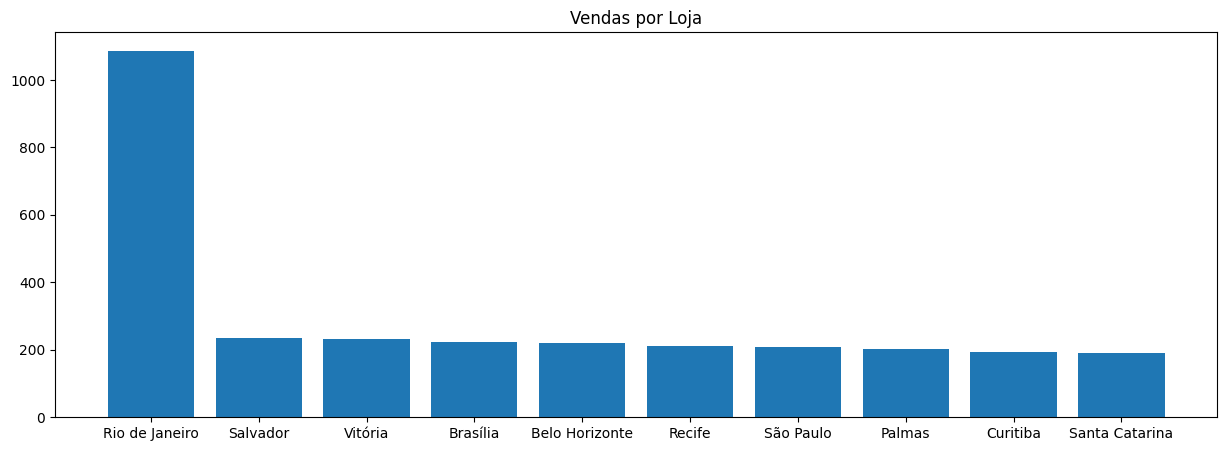

In [7]:
# figsize=(15, 5) -> O tamanho da figura
# plt.bar(categorias, valor) -> Criando um gráfico de barras que cotem a categoria e o valor 
# As categorias está no `graf_dados.index` que são o nome de cada cidade
# O valor está no `graf_dados.values` que são os valores
# title('Vendas por Loja') -> Titulo do gráfico

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Loja')

### Produtos que mais vendem

In [8]:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por produto')

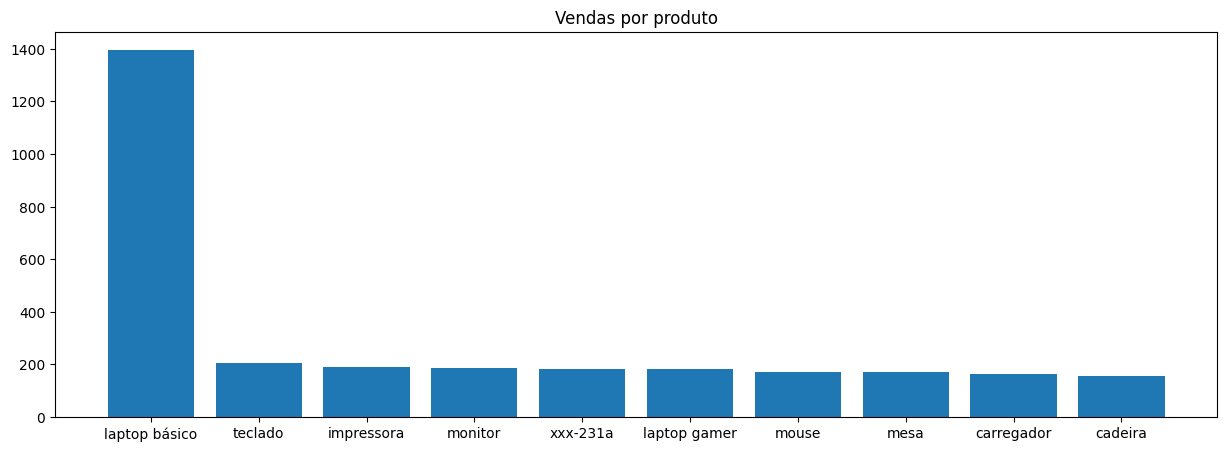

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por produto')